In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import re

import config_error_by_period_syntheic as config

In [2]:
def load_csv_data(path: str) -> pd.core.frame.DataFrame:
    """Load CSV dataset as dataframe"""
    return pd.read_csv(path, delimiter=',')

In [3]:
def plot_error_by_period(df: pd.core.frame.DataFrame) -> None:
    """Plot error by period"""
    df_average = df[-1:]
    dim = config.epoch // config.period
    data_to_visualize = df_average.iloc[:, :dim]

    x_labels = list(range(0, config.epoch, config.period))

    plt.figure(figsize=(10, 6))
    # plt.plot(x_labels, data_to_visualize.values[0], marker='o', linestyle='-')
    plt.plot(x_labels, data_to_visualize.values[0], linestyle='-')

    plt.xlabel('Time step t')
    plt.ylabel('Prediction error')
    plt.grid(True)
    plt.show()

In [4]:
def plot_error_by_period_multiple_with_labels(df_list: list, labels: list) -> None:
    """Plot error by period for multiple dataframes"""
    plt.figure(figsize=(10, 6))

    dim = config.epoch // config.period
    x_labels = list(range(0, config.epoch, config.period))

    for i, (df, label) in enumerate(zip(df_list, labels)):
        df_average = df[-1:]
        data_to_visualize = df_average.iloc[:, :dim]

        # Use regular expression to match label and extract case number
        match = re.search(r'Case (\d+)', label)
        if match:
            case_number = int(match.group(1)) - 1  # Subtract 1 to match with color_dict index
        else:
            case_number = i  # Default to index if label doesn't match

        color = config.color_dict.get(case_number, 'k')  # Default to black if case number not found
        plt.plot(x_labels, data_to_visualize.values[0], linestyle='-', color=color, label=label)

    plt.xlabel('Time step t')
    plt.ylabel('Prediction error')
    plt.grid(True)
    plt.legend()
    plt.show()

## Case 1

In [5]:
case1_df = load_csv_data(config.case1_error_by_period_path)
case1_df

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,19201~19300,19301~19400,19401~19500,19501~19600,19601~19700,19701~19800,19801~19900,19901~20000,Unnamed: 200,Unnamed: 201
0,2,2.02040,2.00749,2.16869,2.13685,2.31867,2.06170,2.07217,1.96479,1.71627,...,0.676244,0.899771,0.924148,0.872500,0.846064,0.802312,0.812904,0.928002,NaN,195.215
1,2,2.04654,2.02537,2.16488,2.23155,2.21584,2.24093,2.27148,1.61964,1.63521,...,0.836403,0.920186,0.766748,0.804884,0.817314,0.666414,0.766954,0.949692,NaN,190.033
2,2,2.00873,2.02952,2.20194,2.28240,2.10222,2.02720,1.98503,1.92382,1.82356,...,0.947066,0.770519,0.848777,0.997597,0.975198,0.889672,0.917846,0.933864,NaN,193.627
3,2,1.99957,2.03689,2.06987,2.30596,2.33200,2.19201,2.06295,1.56409,1.49789,...,0.736698,0.744930,0.952460,0.874853,1.012600,0.761046,0.790599,0.937369,NaN,189.919
4,2,2.01823,2.03495,2.22436,2.22516,2.17688,2.08309,2.05404,1.94913,1.65582,...,0.889477,0.859467,0.870800,0.960186,0.945403,1.010290,1.030870,1.047260,NaN,196.282
5,2,2.00574,2.04201,2.20124,2.34014,2.20618,2.00786,2.03402,1.80234,1.79824,...,0.689372,0.813302,0.961441,0.951839,0.778858,0.749898,0.772831,0.827080,NaN,189.325
6,2,2.04004,2.01278,2.15451,2.22006,2.17331,1.98485,2.06509,1.73176,1.97866,...,0.752516,0.741918,0.717344,0.987655,0.856547,0.781367,0.722492,0.797205,NaN,188.501
7,2,2.09771,2.02591,2.19379,2.20674,2.29374,2.12904,1.98822,1.80756,1.77555,...,0.924126,0.922425,0.833661,0.825801,0.730982,0.787679,1.046530,1.124860,NaN,188.886
8,2,2.06229,2.03458,2.17456,2.17585,2.20364,2.12560,2.31401,1.54686,1.74186,...,0.760068,0.779055,0.951507,0.863171,0.956219,0.832378,0.850715,1.014410,NaN,192.033
9,2,2.05046,2.01863,2.18083,2.28489,2.17709,2.14451,2.20505,1.79823,1.71220,...,0.846669,0.855823,0.838388,0.874082,0.820436,0.854415,0.922111,0.819678,NaN,193.480


In [6]:
# Get last row using values[] 
case1_df_average = case1_df[-1:]
dim = config.epoch // config.period
case1_df_average.iloc[:, :dim]

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,19001~19100,19101~19200,19201~19300,19301~19400,19401~19500,19501~19600,19601~19700,19701~19800,19801~19900,19901~20000
10,2,2.03497,2.02681,2.17347,2.24096,2.21996,2.09968,2.1052,1.77082,1.73353,...,0.812453,0.800114,0.805864,0.83074,0.866527,0.901257,0.873963,0.813547,0.863385,0.937942


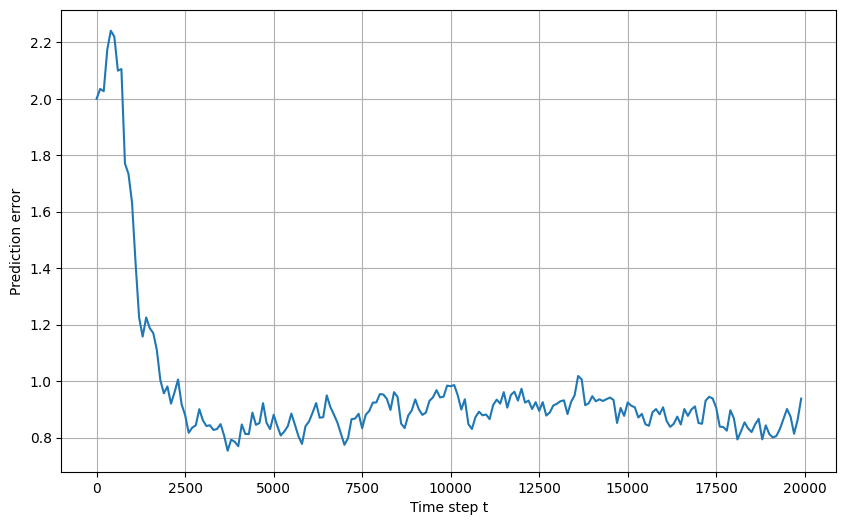

In [7]:
plot_error_by_period(df=case1_df)

# Case 2

In [8]:
case2_df = load_csv_data(config.case2_error_by_period_path)
case2_df

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,19201~19300,19301~19400,19401~19500,19501~19600,19601~19700,19701~19800,19801~19900,19901~20000,Unnamed: 200,Unnamed: 201
0,1.99921,3.04885,3.12529,2.80783,2.63771,2.82245,2.51812,2.36573,2.15250,2.31479,...,2.46046,2.34749,2.39519,2.76379,2.17169,2.19709,1.99261,2.83665,NaN,469.618
1,2.12130,3.11324,3.38380,2.95878,2.67825,2.45476,2.63621,2.65717,2.50671,2.65639,...,2.81193,2.30445,2.50679,2.53364,2.72752,2.61692,2.65276,2.30813,NaN,456.530
2,1.99843,3.03528,3.36893,3.19620,2.74830,2.80112,2.31289,2.27984,2.20341,2.27738,...,2.18571,1.91557,2.72768,2.15865,2.35247,2.39141,2.31530,2.14351,NaN,485.763
3,2.04759,3.53072,3.52984,2.88159,2.58614,2.71394,2.61504,2.37902,2.39756,2.40395,...,2.19902,2.20565,2.44920,2.06250,2.19778,2.07328,2.11107,2.47148,NaN,481.434
4,1.98902,3.15308,3.50904,2.80009,2.56049,3.06650,2.80157,2.74432,2.24914,2.01259,...,2.34218,2.68970,2.20694,2.14481,2.17940,2.32224,2.13570,2.42026,NaN,453.247
5,2.09067,3.78212,3.31018,3.09039,3.14936,2.82839,2.49231,2.17437,2.50926,2.25755,...,2.11127,2.55940,2.44708,2.79518,2.56058,2.72624,2.53629,2.38111,NaN,477.117
6,2.18305,3.76322,4.05005,3.27595,2.47753,2.72882,2.55972,2.33014,2.39904,2.36565,...,2.44114,2.21118,2.50718,2.78433,2.72421,2.31492,2.17576,2.55985,NaN,476.111
7,2.16001,3.33139,3.15537,3.36042,2.17486,1.93830,2.18630,2.25449,2.42500,2.42641,...,2.42964,2.36768,1.88992,2.07578,2.07367,2.03803,1.92474,2.21732,NaN,471.093
8,2.11611,3.21032,3.45722,2.97517,2.65623,2.51223,2.19811,2.21983,2.76801,2.33017,...,2.08570,2.58210,2.01275,1.87602,2.31458,2.47386,2.09585,2.12037,NaN,472.046
9,2.05237,3.65346,3.95479,3.59539,2.94019,2.31549,2.54375,2.24768,2.35257,2.37647,...,2.35842,2.21180,2.47496,2.78571,2.80831,2.34412,2.44889,2.72480,NaN,475.550


In [9]:
# Get last row using values[] 
case2_df_average = case2_df[-1:]
dim = config.epoch // config.period
case2_df_average.iloc[:, :dim]

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,19001~19100,19101~19200,19201~19300,19301~19400,19401~19500,19501~19600,19601~19700,19701~19800,19801~19900,19901~20000
10,2.07578,3.36217,3.48445,3.09418,2.66091,2.6182,2.4864,2.36526,2.39632,2.34213,...,2.48749,2.56744,2.34255,2.3395,2.36177,2.39804,2.41102,2.34981,2.2389,2.41835


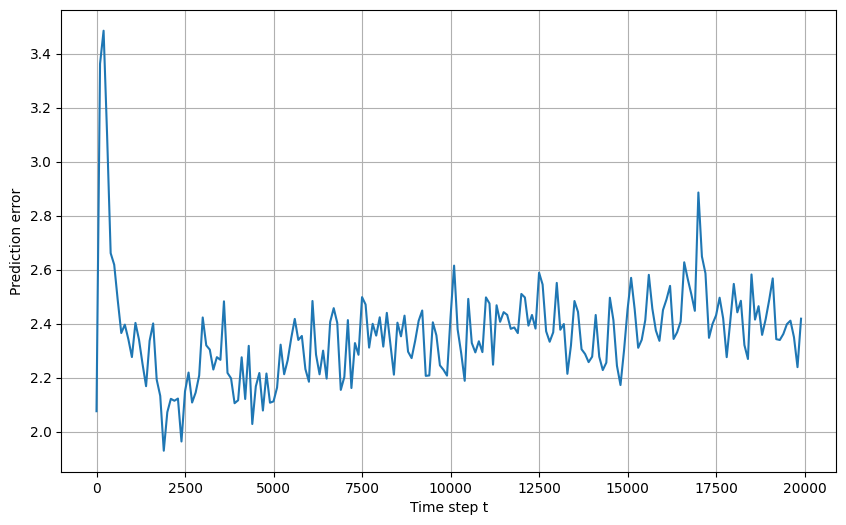

In [10]:
plot_error_by_period(df=case2_df)

# Case 3

In [11]:
case3_df = load_csv_data(config.case3_error_by_period_path)
case3_df

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,19201~19300,19301~19400,19401~19500,19501~19600,19601~19700,19701~19800,19801~19900,19901~20000,Unnamed: 200,Unnamed: 201
0,2,2.00172,2.05858,2.14180,2.22058,2.23578,2.37891,2.63135,2.56741,2.77562,...,47.5007,47.9625,48.4150,48.8273,49.2177,49.7673,50.3043,50.8358,NaN,3991.66
1,2,2.00172,2.05502,2.16320,2.23121,2.27365,2.40628,2.57460,2.57491,2.74335,...,47.5861,47.9618,48.5475,49.1105,49.5329,49.8919,50.4705,50.9055,NaN,3991.18
2,2,2.00172,2.06585,2.13419,2.21878,2.27413,2.34146,2.56012,2.42667,2.79010,...,47.5636,47.9557,48.4592,48.9003,49.3260,49.7411,50.3309,50.8753,NaN,3990.23
3,2,2.03149,2.08051,2.14015,2.19042,2.30928,2.43742,2.56658,2.75411,2.46418,...,47.7676,48.1609,48.6859,49.0527,49.5176,50.0547,50.5475,50.9027,NaN,3996.43
4,2,2.00172,2.05549,2.13953,2.19467,2.31040,2.44133,2.53084,2.55078,2.64389,...,47.6291,48.0792,48.5412,48.9680,49.4065,49.8760,50.3522,50.8868,NaN,3997.30
5,2,2.00172,2.07529,2.13232,2.21045,2.27474,2.42297,2.48649,2.60233,2.80062,...,47.6559,47.9700,48.3881,48.8254,49.4839,49.9851,50.5207,50.8938,NaN,3992.02
6,2,2.01813,2.08270,2.14281,2.18907,2.27250,2.34211,2.51530,2.68242,2.45308,...,47.5847,48.1620,48.5201,49.0652,49.5371,49.8994,50.3030,50.8451,NaN,3994.22
7,2,2.03149,2.06486,2.14265,2.21034,2.30532,2.35100,2.60416,2.71029,2.40415,...,47.6572,48.0346,48.4652,48.9101,49.3862,49.8863,50.3654,50.9145,NaN,3990.01
8,2,2.03149,2.07467,2.15900,2.17424,2.37063,2.43592,2.56261,2.57549,2.37873,...,47.6300,47.9877,48.4740,48.8580,49.3480,49.8848,50.2036,50.8225,NaN,3988.14
9,2,2.00172,2.05208,2.14138,2.20799,2.26960,2.35184,2.49415,2.73170,2.78158,...,47.4871,47.9557,48.4323,48.7781,49.3744,49.8468,50.3105,50.8974,NaN,3990.42


In [12]:
# Get last row using values[] 
case3_df_average = case3_df[-1:]
dim = config.epoch // config.period
case3_df_average.iloc[:, :dim]

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,19001~19100,19101~19200,19201~19300,19301~19400,19401~19500,19501~19600,19601~19700,19701~19800,19801~19900,19901~20000
10,2,2.01229,2.0665,2.1437,2.20478,2.2896,2.39092,2.55262,2.61761,2.62353,...,46.7124,47.192,47.6062,48.023,48.4928,48.9296,49.413,49.8833,50.3709,50.8779


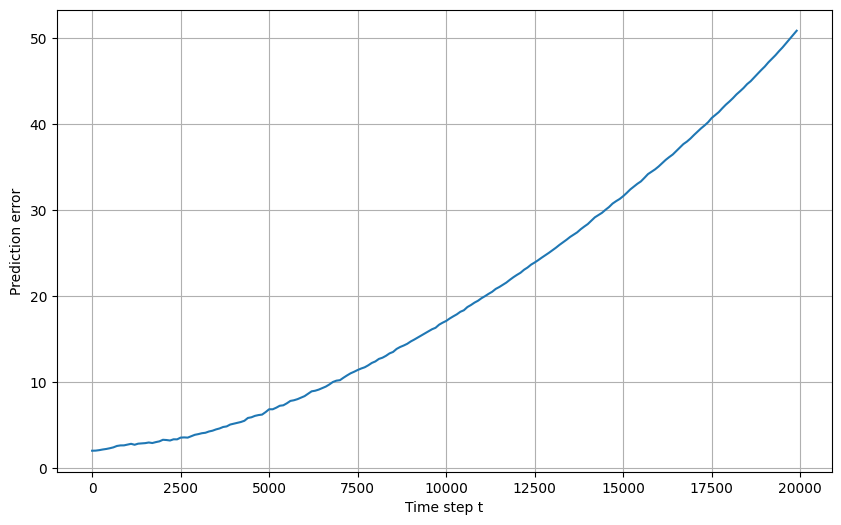

In [13]:
plot_error_by_period(df=case3_df)

# Case 4

In [14]:
case4_df = load_csv_data(config.case4_error_by_period_path)
case4_df

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,19201~19300,19301~19400,19401~19500,19501~19600,19601~19700,19701~19800,19801~19900,19901~20000,Unnamed: 200,Unnamed: 201
0,2,2.01201,2.01969,2.00264,2.01270,2.11431,2.07865,2.21634,2.31685,2.32476,...,0.655334,0.638824,0.693889,0.653422,0.571852,0.745619,0.450425,0.572672,NaN,239.641
1,2,2.04144,2.03028,2.00544,2.08029,2.05601,2.07989,2.33659,2.29156,2.26598,...,0.695968,0.705715,0.690619,0.715368,0.755858,0.651844,0.632834,0.651901,NaN,244.108
2,2,2.03130,2.03915,2.02250,2.02385,2.09945,2.08393,2.29248,2.46670,2.14868,...,0.679744,0.623652,0.599673,0.659246,0.834180,0.583974,0.738543,0.710162,NaN,244.401
3,2,2.02745,2.01138,2.01660,2.03770,2.08656,2.16481,2.16294,2.27261,2.38863,...,0.592478,0.537181,0.613834,0.579606,0.606720,0.602072,0.539705,0.580508,NaN,234.145
4,2,2.05701,2.03249,1.99419,2.02595,2.15979,2.09562,2.23646,2.22366,2.49633,...,0.815520,0.734979,0.648302,0.721450,0.608525,0.534103,0.606443,0.622122,NaN,240.688
5,2,2.02640,2.02132,2.00422,2.03678,2.15234,2.09151,2.23737,2.41010,2.22886,...,0.761892,0.687168,0.623327,0.725033,0.624609,0.566338,0.498976,0.618632,NaN,248.620
6,2,2.01068,2.02026,2.04486,2.08434,2.13349,2.11300,2.10494,2.08589,2.21610,...,0.783574,0.498595,0.616720,0.627590,0.690541,0.626100,0.494037,0.450480,NaN,243.754
7,2,2.00843,2.01217,2.01313,2.02725,2.10445,2.09706,2.14557,2.24014,1.99741,...,0.790115,0.805463,0.737962,0.665256,0.567375,0.526851,0.645417,0.469111,NaN,243.530
8,2,2.02746,2.01119,2.01261,2.06634,2.06565,2.16396,2.11674,2.30293,2.14849,...,0.759102,0.633159,0.615576,0.888273,0.747359,0.556272,0.496684,0.551057,NaN,240.576
9,2,2.02813,2.02379,2.04954,2.06066,2.04817,2.21881,2.26077,2.28327,1.99726,...,0.716758,0.735907,0.731215,0.621981,0.706732,0.669226,0.604085,0.692398,NaN,243.104


In [15]:
# Get last row using values[] 
case4_df_average = case4_df[-1:]
dim = config.epoch // config.period
case4_df_average.iloc[:, :dim]

,1~100,101~200,201~300,301~400,401~500,501~600,601~700,701~800,801~900,901~1000,...,19001~19100,19101~19200,19201~19300,19301~19400,19401~19500,19501~19600,19601~19700,19701~19800,19801~19900,19901~20000
10,2,2.02703,2.02217,2.01657,2.04558,2.10202,2.11872,2.21102,2.28937,2.22125,...,0.736857,0.729162,0.725048,0.660064,0.657112,0.685722,0.671375,0.60624,0.570715,0.591904


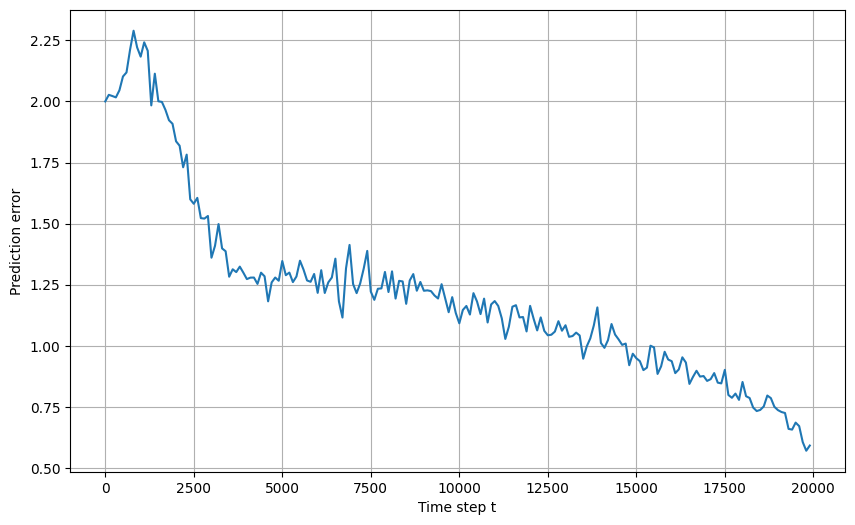

In [16]:
plot_error_by_period(df=case4_df)

## Summary

In [17]:
data_list = []

# The following are the case labels you want to pass
labels = ['Case 1', 'Case 2', 'Case 3', 'Case 4']
# labels = ['Case 1', 'Case 4']

# The following are the case labels you want to pass
data_list.append(case1_df)    # Add error values for Case 1
data_list.append(case2_df)    # Add error values for Case 2
data_list.append(case3_df)    # Add error values for Case 3
data_list.append(case4_df)    # Add error values for Case 4

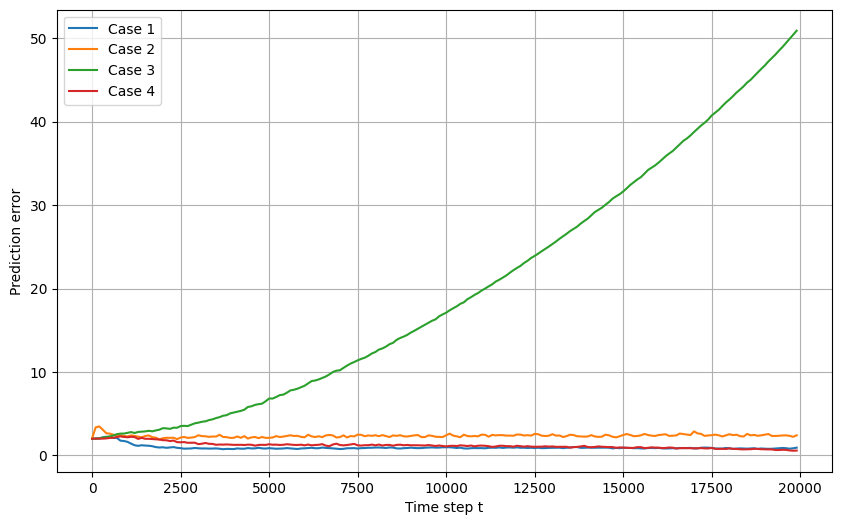

In [18]:
# plot_error_by_period_multiple(df_list=data_list)
plot_error_by_period_multiple_with_labels(df_list=data_list, labels=labels)